In [1]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from skimage import io

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [2]:

# Define the directories for the tomato images with and without disease
disease_dir = "C:/Users/LOKESH/OneDrive/Desktop/Dataset"
healthy_dir = "E:/Healthy"


In [3]:

# Load the dataset of tomato images
X = []  # List to store the image data
y = []  # List to store the labels


In [7]:

# loop through the dataset and extract features and labels
for subdir, dirs, files in os.walk(disease_dir):
    for file in files:
        # load the image and resize it
        image_path = os.path.join(subdir, file)
        image = io.imread(image_path)
        resized_image = resize(image, (64, 64), anti_aliasing=True)
        # extract features from the resized image and add it to the X list
        X.append(resized_image)
        y.append(1)

In [8]:

# Add healthy tomato images to the dataset
for img_file in os.listdir(healthy_dir):
    img = cv2.imread(os.path.join(healthy_dir, img_file))
    img = cv2.resize(img, (64, 64))  # Resize image to 64x64 pixels
    X.append(img)
    y.append(0)  # Label for healthy tomato image is 0


In [9]:

# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)


In [10]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:

# Flatten the image data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [12]:

# Create Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [13]:

# Train the classifier on the training set
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Predict the labels for the testing set
y_pred = clf.predict(X_test)


In [15]:

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)


In [16]:

# Print the accuracy of the classifier
print(f"Accuracy of Random Forest classifier: {accuracy}")


Accuracy of Random Forest classifier: 1.0


In [17]:

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


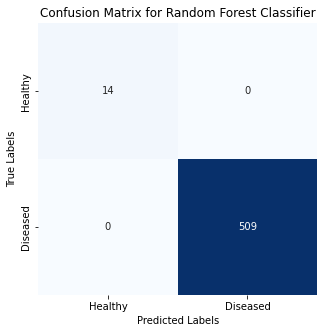

In [18]:

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["Healthy", "Diseased"], yticklabels=["Healthy", "Diseased"])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [27]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       509

    accuracy                           1.00       523
   macro avg       1.00      1.00      1.00       523
weighted avg       1.00      1.00      1.00       523



In [28]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 14   0]
 [  0 509]]
